In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('viridis')

In [2]:
train = '../data/train.csv'
weather = '../data/weather.csv'
spray = '../data/spray.csv'

In [3]:
train = pd.read_csv(train)
weather = pd.read_csv(weather)
spray = pd.read_csv(spray)

In [4]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
train.shape

(10506, 12)

In [6]:
train.columns = train.columns.map(lambda x: x.lower())

#### Date

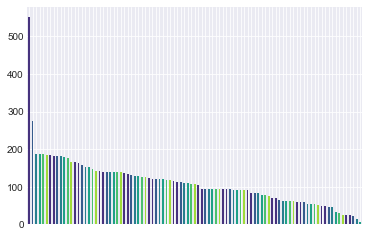

In [7]:
pd.value_counts(train['date'].values, sort=True).plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

#### Species

In [8]:
train.species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [9]:
train.species = train.species.map({'CULEX PIPIENS/RESTUANS': 'CULEX PIPIENS/RESTUANS',
                   'CULEX RESTUANS': 'CULEX RESTUANS',
                   'CULEX PIPIENS': 'CULEX PIPIENS',
                   'CULEX TERRITANS': 'CULEX OTHER', 
                   'CULEX SALINARIUS': 'CULEX OTHER',
                   'CULEX TARSALIS': 'CULEX OTHER',
                   'CULEX ERRATICUS': 'CULEX OTHER'})

In [10]:
train.species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX OTHER                315
Name: species, dtype: int64

#### Address Accuracy

In [11]:
train.addressaccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: addressaccuracy, dtype: int64

#### Number of Mosquitos

Text(0,0.5,'Count')

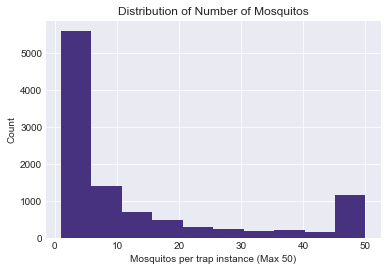

In [12]:
train.nummosquitos.hist()
plt.title('Distribution of Number of Mosquitos')
plt.xlabel('Mosquitos per trap instance (Max 50)')
plt.ylabel('Count')

#### WNV Present

In [13]:
train.wnvpresent.value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

In [14]:
train.wnvpresent.mean()

0.05244622120692937

In [34]:
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [37]:
weather.Tavg.unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

In [102]:
def missing_detector(missing, row):
    #returns false if the series has an 'M' and true otherwise
    for col in row.index:
        if row == 'M':
            return False
    return True

Every single row has missing observations :(

In [103]:
weather.loc[0].index

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [104]:
series = weather.loc[0]

In [124]:
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [148]:
weather.Station.value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [149]:
weather.Date.unique()

array(['2007-05-01', '2007-05-02', '2007-05-03', ..., '2014-10-29',
       '2014-10-30', '2014-10-31'], dtype=object)

In [130]:
['Depart'].unique()

array(['14', 'M', '-3', ' 2', ' 4', ' 5', '10', '12', '13', '-2', '15',
       '11', '-4', '-6', ' 8', '-5', ' 1', ' 9', ' 6', '-9', '-8', ' 3',
       ' 0', '-1', '-7', ' 7', '-14', '18', '16', '22', '21', '20', '-10',
       '-16', '17', '-12', '-11', '-15', '-17', '19', '-13', '23'],
      dtype=object)

In [147]:
weather.PrecipTotal.value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
0.04      36
0.05      32
0.12      28
0.08      28
0.06      27
0.07      23
0.09      21
0.16      21
0.14      20
0.11      20
0.17      17
0.28      15
0.19      14
0.18      14
0.13      14
0.20      13
0.15      13
0.23      11
0.25      11
0.26      11
0.10      10
0.24      10
0.21       9
0.43       9
0.39       9
        ... 
0.62       1
3.07       1
1.14       1
1.49       1
1.09       1
3.15       1
1.48       1
1.06       1
1.96       1
1.21       1
1.38       1
2.60       1
1.57       1
6.86       1
1.90       1
4.73       1
0.91       1
3.97       1
3.66       1
1.19       1
0.76       1
1.75       1
0.98       1
1.44       1
3.64       1
1.07       1
1.25       1
1.24       1
1.46       1
1.34       1
Name: PrecipTotal, Length: 168, dtype: int64

In [129]:
weather.SnowFall.value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64

In [ ]:
weahter.drop('SnowFall', 1, inplace=True)

Tavg           2944 non-null object  

Depart         2944 non-null object

WetBulb        2944 non-null object

Heat           2944 non-null object

Cool           2944 non-null object

Sunrise        2944 non-null object

Sunset         2944 non-null object


CodeSum        2944 non-null object

Depth          2944 non-null object

Water1         2944 non-null object

SnowFall       2944 non-null object


PrecipTotal    2944 non-null object

StnPressure    2944 non-null object

SeaLevel       2944 non-null object

/Users/timdwyer/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/timdwyer/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


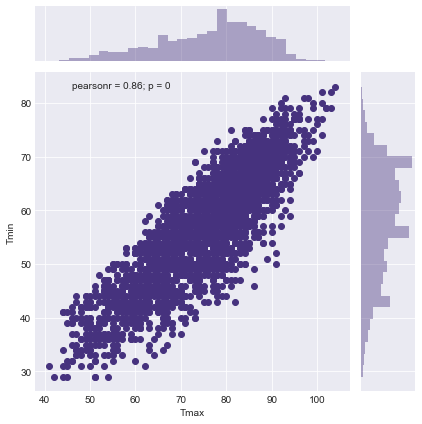

In [30]:
sns.jointplot(weather.Tmax, weather.Tmin)